# Linear Regression
**Sibt ul Hussain**

In [1]:
%pylab inline
plt.style.use('ggplot')
plt.rcParams['image.interpolation'] = 'nearest'

Populating the interactive namespace from numpy and matplotlib


$$ f(x) = x^4-4x^3+2 $$

In [2]:
f=lambda x: x**4-4*x**3+2

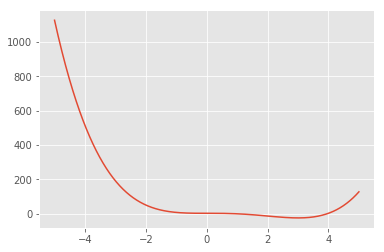

In [9]:
x=np.linspace(-5,5,1000)
y= f(x)
plt.plot(x,y)

### Brute-force Search
Lets do a brute-force search for the given variable in the limit.

In [37]:
minimum=+inf
mx=+inf

# Your code here
for x in frange(-999, 1000, 0.01):
    
    if minimum > f(x):
        minimum = f(x)
        mx = x

print("Local minimum occurs at {}".format(mx))

Local minimum occurs at 3.0


### Gradient Descent

In [25]:
def f_derivative(x):
    # Your code here
    # Calculate the derivative and write your code here
    return  4*x**3-12*x**2

In [38]:
x_old = 0
x_new = np.random.rand(1,1) 
eps = 0.01 # step size
precision = 0.00001

# Your code here

for x in range(100):
    x_old = x_new
    x_new = x_old - eps * f_derivative(x_old)
    if (x_new - x_old) < precision:
        break
print "Local minimum occurs at", x_new

Local minimum occurs at [[ 2.9999851]]


#### Always Check your gradient, before debugging gradient descent,

We know that $$\frac{\partial f}{\partial x}=\frac{f(x+\epsilon)-f(x)}{\epsilon}$$

So always compare the difference between computed gradient using this formula.


#### Lets Check

In [46]:
eps=0.00001
x=1.5
dfx=(f(x+eps)-f(x))/eps
cdfx=f_derivative(x)

print dfx, cdfx, dfx-cdfx

-13.5000449999 -13.5 -4.49999367316e-05


### Let's generate some random data

In [47]:
X = np.arange(0,5,0.1, dtype=np.float32)
delta = np.random.uniform(-1,1, size=X.shape[0])
Y = .4 * X + 3 + delta

#making a copy for later use
rx = X
ry = Y

Text(0,0.5,u'Y')

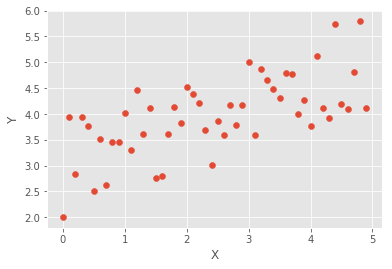

In [48]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

### Let's visualize our solution space

In [49]:
cf=lambda t0,t1,x,y: np.dot(t1*x+t0-y,t1*x+t0-y)
#square error

In [50]:
t0=arange(-5,+5,0.01)
t1=arange(-5,+5,0.01)

In [51]:
ecf=np.zeros((len(t0),len(t1)))

for i in range(len(t0)):
    for j in range(len(t1)):
        ecf[i,j]=cf(t0[i],t1[j],X,Y)

In [52]:
print ecf

[[ 25501.26988822  25438.19741916  25375.20869706 ...,   2761.64817469
    2779.18469114   2796.80118619]
 [ 25480.05452053  25417.00646341  25354.04213507 ...,   2764.85969171
    2782.4207061    2800.06170755]
 [ 25458.84911043  25395.82587854  25332.8862622  ...,   2768.08123655
    2785.66673482   2803.33224703]
 ..., 
 [  9314.91930172   9276.27368492   9237.71070769 ...,  10928.51656725
   10970.48037455  11012.52258422]
 [  9303.6739876    9265.05288291   9226.51439452 ...,  10941.69831206
   10983.68662065  11025.75333013]
 [  9292.43884225   9253.84228093   9215.32831854 ...,  10954.8898118
   10996.90248587  11038.99382617]]


In [53]:
# Generate theta_0 and theta_1 values for the cost function...
tX, tY = np.meshgrid(t0, t1)
print tX.shape, tY.shape

(1000, 1000) (1000, 1000)


In [54]:
print ecf.shape

(1000, 1000)


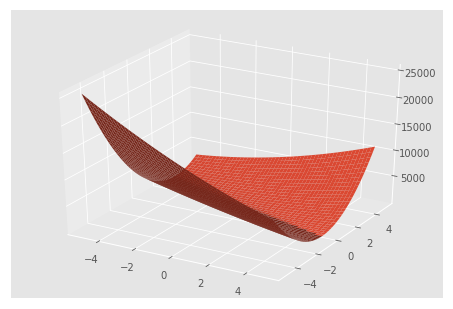

In [55]:
#Plot the cost function...
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(tX,tY,ecf.T)
# ax.set_xlabel(r'$\theta_0$(Intercept)')
# ax.set_ylabel(r'$\theta_1$(Slope)')
# ax.set_zlabel(r'$J(\theta_0,\theta_1)$(Cost Function)')

### Time for our regression implementation

$$
h(X, \theta) = X^T . \theta
$$

In [56]:
def hyp(theta, X):
    # Your code here
    hp=np.dot(X, theta.T)
    return hp

$$
cost = \frac{1}{2m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)}^2
$$

In [57]:
def cost_function(theta,X,Y):
    # Your code here
    return np.mean((Y-hyp(theta, X))**2) / 2

$$
\frac{\delta}{\delta \theta_j} = \frac{1}{m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)} * X_j
$$

In [58]:
def derivative_cost_function(theta,X,Y):
    nexamples=float(X.shape[0])
    # Your code here
    res = ((Y - hyp(theta, X))[:,newaxis] * X)
    dthetas = np.mean(res, axis=0)
    return dthetas[0] * -1, dthetas[1] * -1

In [59]:
print X.shape
nx=np.hstack((X,ones(len(X),)))
nx=nx.reshape((2,X.shape[0])).T
print nx.shape

(50,)
(50, 2)


In [60]:
np.random.seed(20) # To make sure you have the same value as me
eps=0.0001
nexamples=float(nx.shape[0])
thetas=np.random.rand(nx.shape[1],)
print thetas

[ 0.5881308   0.89771373]


In [61]:
cf=cost_function(thetas,nx,Y)
print cf

1.55867327298


In [62]:
ad=derivative_cost_function(thetas,nx,Y)
print ad

(-3.4823342241382118, -1.631422101212739)


In [67]:
#Gradient Descent...
def GradientDescent(X,Y,cost_function,derivative_cost_function,maxniter=20000):
    nexamples=float(X.shape[0])
    thetas=rand(X.shape[1],)
    
    eps=0.00001
    alpha=0.01
    cf=[]
    numiter=0
    
    # Your code here
    theta_new = []
    dtheta1 = 0
    dtheta0 = 0
    for i in range(maxniter):    
        dtheta0, dtheta1 = derivative_cost_function(thetas, X, Y)
        thetas[0] = thetas[0] - alpha + dtheta0
        thetas[1] = thetas[1] - alpha + dtheta1
        #print thetas[0], thetas[1]
        cf.append(cost_function(thetas, X, Y))
        if (dtheta0**2 + dtheta1**2) < eps:
            break
        
    theta_new.append(thetas[0])
    theta_new.append(thetas[1])
    
    return theta_new

In [68]:
theta_new=GradientDescent(nx,Y,cost_function,derivative_cost_function)

/home/sharan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sharan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in double_scalars


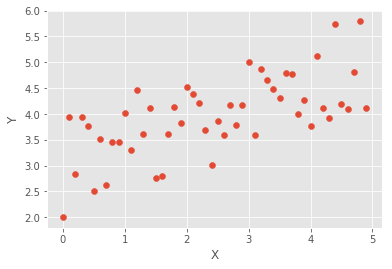

In [69]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(nx[:,0],np.dot(nx,theta_new))